<a href="https://colab.research.google.com/github/estevaosmith/Portifolio/blob/main/%5BPROJETO%5D_Detec%C3%A7%C3%A3o_de_Fraude_em_Cart%C3%B5es_de_Cr%C3%A9dito.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Detecção de Fraudes em Cartões de Crédito

Neste projeto, vamos explorar a questão das fraudes em cartões de crédito, uma das principais inquietações das entidades financeiras como bancos e fintechs. Somente no território brasileiro, aproximadamente 12,1 milhões de indivíduos foram alvos de algum tipo de fraude financeira no período mais recente. Em termos monetários, as atividades fraudulentas resultaram em um prejuízo que ultrapassa a marca de R$ 1,8 bilhão ao longo dos últimos 12 meses.

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/hacker-com-capuz-roubando-informacoes-do-monitor-do-computador-conceito-de-cibercrime_1142-40429.jpg?t=st=1709686041~exp=1709689641~hmac=6bf0846cf1d2e0f6646d4434f99301b50dd64f5587f5b5cd7223fd15803a3a7b&w=996" width="60%"></p>

Entre as diversas fraudes, aquelas relacionadas aos cartões de crédito são particularmente relevantes, já que sua não identificação pode resultar em perdas significativas, tanto para o cliente quanto para a instituição financeira.

Outro aspecto a se considerar é o alto número de falsos positivos, isto é, as situações em que uma tentativa legítima de compra é erroneamente bloqueada pelo sistema de segurança do cartão, o que muitas vezes causa desconforto e constrangimento ao consumidor.

Por essas razões, o investimento na detecção de fraudes utilizando Inteligência Artificial está em constante crescimento, representando uma grande oportunidade na área de Ciência de Dados.

Com grandes conjuntos de dados como base histórica, um algoritmo de aprendizado de máquina apenas ligeiramente superior aos anteriores pode resultar em economias significativas, na ordem dos milhões de Reais. O desafio consiste em aprimorar continuamente o uso de algoritmos para prevenir ou detectar transações fraudulentas.

## Importando os Dados
As informações que serão utilizadas neste projeto foram fornecidas por algumas empresas europeias de cartão de crédito. O conjunto de dados retrata as transações financeiras ocorridas ao longo de dois dias, contendo 492 casos de fraude entre quase 290 mil transações.

É evidente que este conjunto de dados apresenta um desequilíbrio significativo, visto que as ocorrências de fraude representam apenas 0,17% do total.

Outro detalhe interessante é que as *features* são todas numéricas, e foram descaracterizadas (por problemas ligados à privacidade e segurança). Assim, os nomes das colunas são representados por $[V1, V2, V3 \dots, V28]$

<p align=center>
<img src="https://img.freepik.com/fotos-gratis/laptop-de-alta-vista-e-cartao-de-compras-preto_23-2148670030.jpg?t=st=1709686394~exp=1709689994~hmac=982c9b114087874d79db41d3810dbb32329cfd0d84a644606126599229dd0570&w=996" width="50%"></p>

[Na página original dos dados](https://www.kaggle.com/mlg-ulb/creditcardfraud), também é mencionado que as variáveis foram submetidas a uma técnica de transformação conhecida como Análise de Componentes Principais (Principal Component Analysis - PCA).

A PCA possibilita a redução da dimensionalidade, preservando o máximo de informações possível. Para alcançar esse objetivo, o algoritmo identifica um novo conjunto de características - os chamados componentes.

Esses componentes são em número menor ou igual ao número de variáveis originais. No contexto deste projeto, os componentes obtidos pela transformação da PCA correspondem às próprias colunas $[V1, V2, V3 \dots, V28]$.

In [49]:
# importar os pacotes necessários



import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scikitplot as skplt


from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, accuracy_score

from imblearn.under_sampling import RandomUnderSampler

# configurar o estilo dos gráficos com o Seaborn
sns.set_style('darkgrid')


In [50]:
df = pd.read_csv('https://www.dropbox.com/s/b44o3t3ehmnx2b7/creditcard.csv?dl=1')

# dimensões do conjunto original
print("Dimensões do Conjunto Original: ", df.shape)

# criando o conjunto de teste
test = df.sample(frac=0.15, random_state=0)

# drop das linhas de teste
df = df.drop(test.index)

# verificando o conjunto
print("Dimensões do Conjunto de Teste: ", test.shape)
print("Dimensões do Conjunto de Treino: ", df.shape)

Dimensões do Conjunto Original:  (284807, 31)
Dimensões do Conjunto de Teste:  (42721, 31)
Dimensões do Conjunto de Treino:  (242086, 31)


Após importar os dados para um DataFrame e não precisar de mais ajustes ou configurações nesta fase, podemos começar uma análise exploratória dos dados para preparar um modelo de Machine Learning.

É importante lembrar de realizar a divisão dos conjuntos para evitar vazamento de dados.

Feito isso, vamos prosseguir com a Análise Exploratória.

## Análise Exploratória
Analisar as cinco primeiras entradas possibilita algumas inferências:

Observando as cinco primeiras entradas, é viável compreender como a transformação PCA anonimizou as características das features, transformando-as em valores numéricos. As colunas Tempo (Time) e Valor (Amount) permaneceram intactas, mantendo seus valores originais.

A variável de interesse está indicada na coluna Classe (Class), onde:

**(0)** representa uma transação normal; e

**(1)** representa uma transação fraudulenta.

In [51]:
df.head()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
0,0.0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,...,-0.018307,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,149.62,0
1,0.0,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,...,-0.225775,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,2.69,0
2,1.0,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,...,0.247998,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,378.66,0
3,1.0,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,...,-0.108300,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,123.50,0
4,2.0,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,...,-0.009431,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,69.99,0


Ao examinarmos o resumo estatístico fornecido pelo método `describe()`, podemos confirmar que não há discrepâncias evidentes nas variáveis associadas aos componentes principais (resultado da transformação PCA), assim como na coluna `Time`.

Quanto à variável Valor `Amount`, observamos que a média das transações (considerando ambas as classes) é de 88.34, com mediana de 22.00 e desvio padrão de 250.12. Com o valor máximo atingindo 25691.16, a maioria das transações financeiras consiste principalmente em quantias menores, o que é esperado.

In [52]:
df.describe()

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
count,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,...,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000,242086.000000
mean,94857.597379,0.001456,-0.000800,-0.001004,0.000647,-0.000986,-0.001196,-0.000033,-0.000416,-0.000725,...,-0.000015,0.000606,-0.000482,0.000199,0.000048,-0.000269,-0.000727,0.000065,88.612429,0.001727
std,47490.660832,1.956513,1.654883,1.514580,1.417228,1.366284,1.326879,1.223095,1.199718,1.099350,...,0.734189,0.726284,0.629651,0.605150,0.521574,0.482084,0.401490,0.327734,247.655020,0.041517
min,0.000000,-56.407510,-72.715728,-33.680984,-5.683171,-42.147898,-26.160506,-43.557242,-73.216718,-13.434066,...,-34.830382,-10.933144,-44.807735,-2.822684,-10.295397,-2.604551,-22.565679,-11.710896,0.000000,0.000000
25%,54234.000000,-0.920406,-0.598659,-0.893374,-0.848236,-0.693615,-0.769025,-0.553805,-0.208857,-0.645058,...,-0.228492,-0.542962,-0.161941,-0.354494,-0.316853,-0.327387,-0.070744,-0.052903,5.662500,0.000000
50%,84747.000000,0.019230,0.064567,0.177607,-0.018959,-0.054544,-0.274310,0.040344,0.022160,-0.051370,...,-0.028987,0.007162,-0.011175,0.040764,0.017175,-0.052337,0.001131,0.011209,22.000000,0.000000
75%,139362.000000,1.316034,0.803174,1.026561,0.743691,0.611455,0.397688,0.570104,0.327186,0.597195,...,0.187064,0.529814,0.147358,0.439320,0.350795,0.241214,0.090776,0.078234,77.580000,0.000000
max,172792.000000,2.451888,22.057729,9.382558,16.875344,34.801666,23.917837,44.054461,20.007208,15.594995,...,27.202839,10.503090,22.528412,4.022866,7.519589,3.517346,12.152401,33.847808,19656.530000,1.000000


Em relação à integridade do conjunto de dados, não foram identificados valores ausentes que exigissem procedimentos de limpeza. Ao analisar a função abaixo, é evidente que o maior valor por coluna para valores nulos é zero, confirmando a ausência de valores ausentes no conjunto de dados.

In [53]:
df.isnull().sum().max()

0

Conforme descrito nos dados, as entradas referentes a transações fraudulentas representam apenas 0,17% do conjunto total.

O gráfico de barras ilustra claramente essa disparidade. Essa discrepância tem um impacto significativo no desempenho do modelo e requer um balanceamento dos dados antes de alimentar o modelo final de classificação.

0    241668
1       418
Name: Class, dtype: int64

Fraudes representam 0.1727% do dataset.



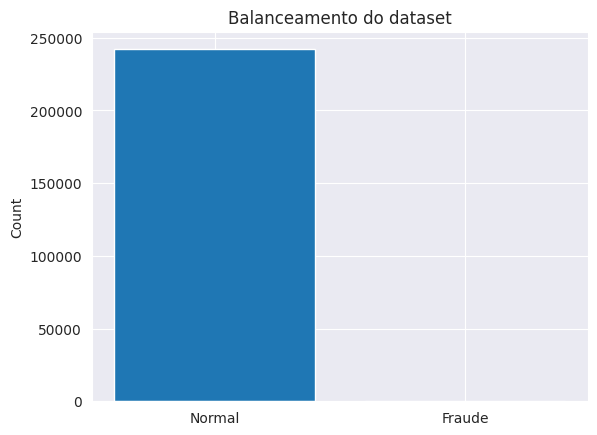

In [54]:
# Observar o balanceamento das classes
print(df.Class.value_counts())
print("\nFraudes representam {:.4f}% do dataset.\n".format((df[df.Class == 1].shape[0] / df.shape[0]) * 100))
# Contagem de valores não nulos na coluna 'Class'
non_null_count = df['Class'].count()

# Contagem de valores iguais a 0 na coluna 'Class'
null_count = len(df) - non_null_count

# Criar o gráfico de barras
plt.bar(['Normal', 'Fraude'], [non_null_count, null_count])
plt.ylabel('Count')
plt.title('Balanceamento do dataset')
plt.show()


Após a análise exploratória,criei boxplots para examinar possíveis disparidades nos padrões das transações em relação à variável 'Amount'.

De forma geral, observa-se uma distribuição distinta para as duas classes, o que provavelmente terá impacto positivo no treinamento do modelo de machine learning.

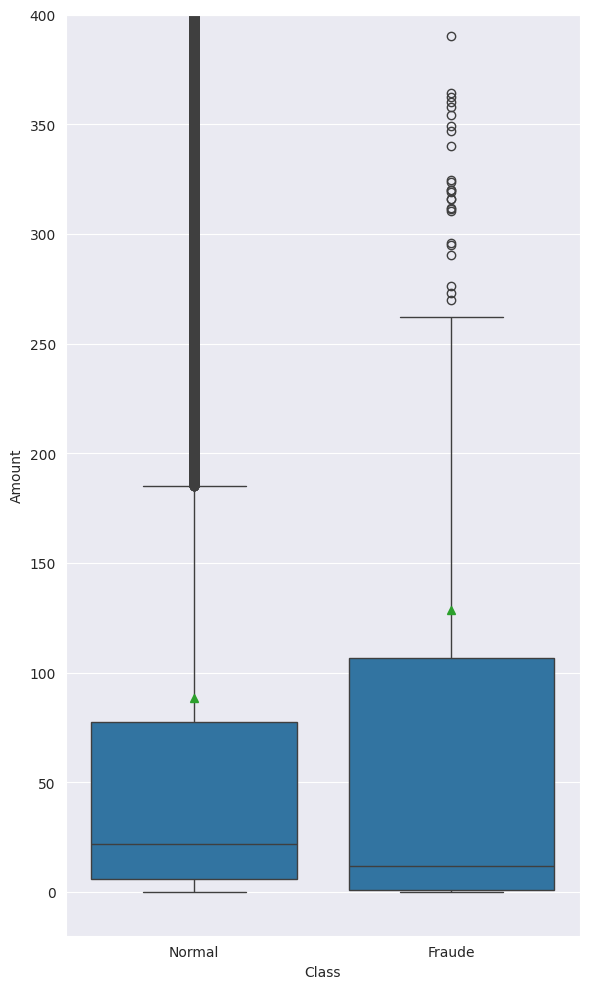

In [55]:
fig, ax = plt.subplots(figsize=(6,10), sharex=True)

sns.boxplot(x='Class', y='Amount', data=df, showmeans=True)
plt.ylim((-20, 400))
plt.xticks([0, 1], ['Normal', 'Fraude'])

plt.tight_layout()

In [56]:
df[(df.Class == 1)]['Amount'].describe()

count     418.000000
mean      128.496722
std       267.731154
min         0.000000
25%         1.000000
50%        11.855000
75%       106.812500
max      2125.870000
Name: Amount, dtype: float64

As informações estatísticas para df.Class == 1(Fraudes) mostram que a sua média está em 128.50 e a mediana em 11.85

Em resumo, algumas das principais observações extraídas da fase exploratória foram:

- O conjunto de dados apresenta um desbalanceamento significativo, com transações fraudulentas representando apenas 0,17% do total.
- Não foram identificados valores ausentes ou nulos no dataframe.
- Devido à sensibilidade da PCA à escala das variáveis, presume-se que as características originais tenham sido padronizadas.
- As colunas 'Time' e 'Amount' não foram normalizadas.

## Preparação dos Dados
Nesta etapa, iremos:

* Normalizar os dados que ainda não haviam sido pré-processados (`Time` e `Amount`)
* Dividir o conjunto de dados entre treino e teste.
* Vou balancear os dados para uma melhor performance do nosso modelo de Machine Learning.



In [57]:
# Normalizar as colunas Time e Amount
df_clean = df.copy()

std_scaler = StandardScaler()
df_clean['std_amount'] = std_scaler.fit_transform(df_clean['Amount'].values.reshape(-1, 1))
df_clean['std_time'] = std_scaler.fit_transform(df_clean['Time'].values.reshape(-1, 1))

df_clean.drop(['Time', 'Amount'], axis=1, inplace=True)


df_clean.head()

,V1,V2,V3,V4,V5,V6,V7,V8,V9,V10,...,V22,V23,V24,V25,V26,V27,V28,Class,std_amount,std_time
0,-1.359807,-0.072781,2.536347,1.378155,-0.338321,0.462388,0.239599,0.098698,0.363787,0.090794,...,0.277838,-0.110474,0.066928,0.128539,-0.189115,0.133558,-0.021053,0,0.246341,-1.997399
1,1.191857,0.266151,0.166480,0.448154,0.060018,-0.082361,-0.078803,0.085102,-0.255425,-0.166974,...,-0.638672,0.101288,-0.339846,0.167170,0.125895,-0.008983,0.014724,0,-0.346945,-1.997399
2,-1.358354,-1.340163,1.773209,0.379780,-0.503198,1.800499,0.791461,0.247676,-1.514654,0.207643,...,0.771679,0.909412,-0.689281,-0.327642,-0.139097,-0.055353,-0.059752,0,1.171178,-1.997378
3,-0.966272,-0.185226,1.792993,-0.863291,-0.010309,1.247203,0.237609,0.377436,-1.387024,-0.054952,...,0.005274,-0.190321,-1.175575,0.647376,-0.221929,0.062723,0.061458,0,0.140872,-1.997378
4,-1.158233,0.877737,1.548718,0.403034,-0.407193,0.095921,0.592941,-0.270533,0.817739,0.753074,...,0.798278,-0.137458,0.141267,-0.206010,0.502292,0.219422,0.215153,0,-0.075195,-1.997357


**Dividir entre conjuntos de Treino e teste**

Para garantir uma distribuição proporcional das classes nos conjuntos de Treino e Validação, aplicamos a opção `stratify=y`. A variável `shuffle=True` é utilizada para aleatorizar os dados, tornando nosso conjunto de teste o mais aleatório possível.

In [58]:
# separar variáveis entre X e y
X = df_clean.drop('Class', axis=1)
y = df['Class']

X_test, X_train, y_test,y_train = train_test_split(X,y,test_size = 0.2 ,  shuffle=True, stratify=y  )

Por meio da biblioteca `imblearn`, é viável empregar técnicas de balanceamento de dados de forma simples. Neste projeto, optei por utilizar a técnica de Under-sampling para equilibrar as classes, mantendo a classe minoritária.

In [59]:
# instância do RandomUnderSampler
under_sampler = RandomUnderSampler(random_state=42)

# Aplicando o under-sampling aos dados de treinamento X_train e y_train
X_resampled, y_resampled = under_sampler.fit_resample(X_train, y_train)


Com a equalização dos dados, torna-se possível examinar a matriz de correlação e determinar quais variáveis estão mais fortemente interligadas entre si.

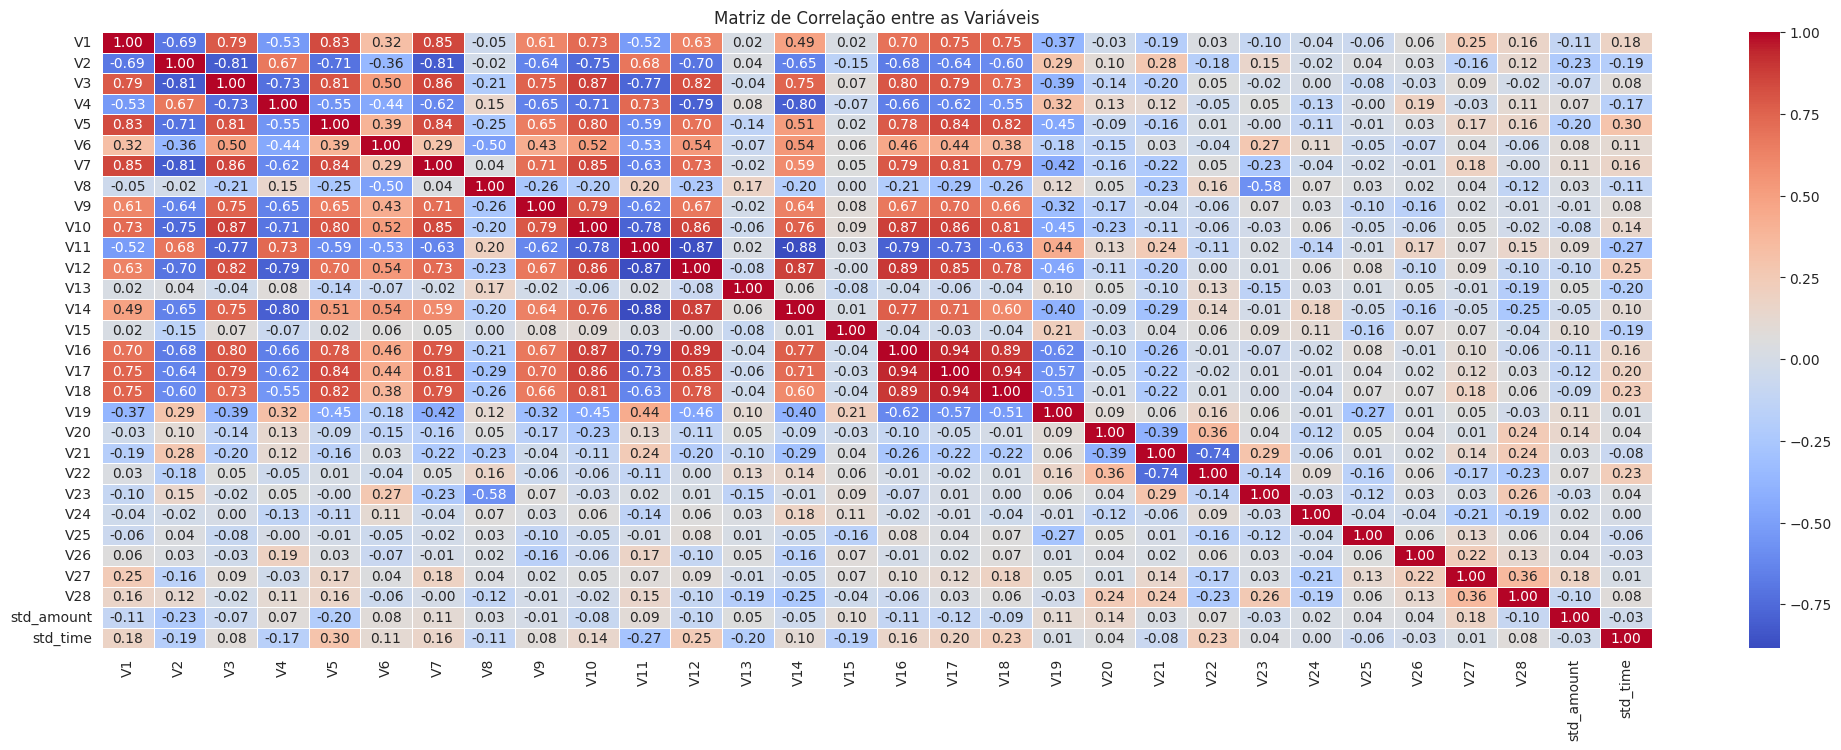

In [60]:
correlation_matrix = pd.DataFrame(X_resampled).corr()

# Criar o heatmap
plt.figure(figsize=(25, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5)
plt.title('Matriz de Correlação entre as Variáveis')
plt.show()

## Modelo de Machine Learning
Com todos os dados organizados e após uma análise exploratória detalhada, pretendo desenvolver um classificador utilizando a Regressão Logística.

Após a criação da instância do modelo, ele será treinado com os dados contidos em `X_resampled` e `y_resampled`. Em seguida, serão feitas previsões com base nos dados de teste.

In [61]:
# Instanciar o modelo de Regressão Logística
modelo_reglog = LogisticRegression()

# Treinar o modelo com os dados de treinamento
modelo_reglog.fit(X_resampled, y_resampled)

# Fazer previsões com base nos dados de teste
y_pred = modelo_reglog.predict(X_test)
y_proba = modelo_reglog.predict_proba(X_test)


## Avaliar o desempenho do modelo
Com o modelo treinado e as previsões realizadas, é o momento de avaliar o desempenho. A matriz de confusão pode ser observada para verificar a taxa de acertos nas transações fraudulentas, ou pela coluna recall do Relatório de Classificação.

Outra métrica considerada relevante para avaliar a eficácia é a AUC ROC, que representa a área sob a curva. Neste modelo de Regressão Logística, obtemos uma AUC de 93%.

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9740    0.9867    193334
           1     0.0560    0.8922    0.1053       334

    accuracy                         0.9739    193668
   macro avg     0.5279    0.9331    0.5460    193668
weighted avg     0.9982    0.9739    0.9852    193668

Acurácia: 0.9739

AUC: 0.9331



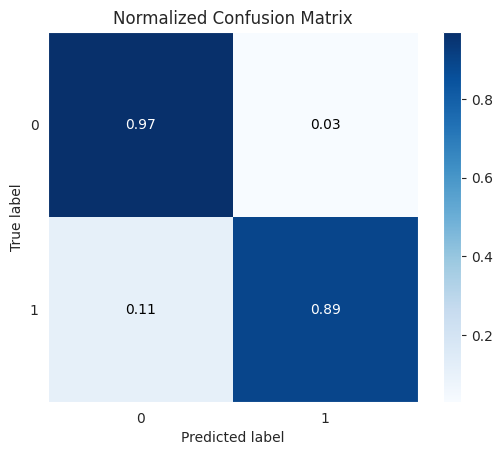

In [62]:
# plotar a matrix de confusão
skplt.metrics.plot_confusion_matrix(y_test, y_pred, normalize = True)

# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

## Testando nosso modelo em outro conjunto
No início do projeto, procedemos com a divisão dos dados em três conjuntos: um para treinamento, um para validação e outro para teste.

Agora, após a exploração e preparação dos dados, incluindo a instância do modelo e a realização de previsões no conjunto de validação, é o momento de avaliar o potencial desse modelo simples com os dados de teste.

Nossa abordagem consistirá apenas em aplicar o modelo treinado a um novo conjunto de dados. Entretanto, para garantir a equidade dos resultados, é essencial que os novos dados estejam nas mesmas condições que o nosso modelo espera.

Neste caso, é necessário padronizar as colunas Time e Amount. Não podemos realizar o balanceamento dos dados, pois isso resultaria em perdas. Nosso modelo precisa ser tratado, mas devemos fazer previsões para todas as linhas que ele receber.

In [63]:
# padronizar as colunas Time e Amount - Teste
test_clean = test.copy()

std_scaler = StandardScaler()
test_clean['std_amount'] = std_scaler.fit_transform(test_clean['Amount'].values.reshape(-1, 1))
test_clean['std_time'] = std_scaler.fit_transform(test_clean['Time'].values.reshape(-1, 1))

test_clean.drop(['Time', 'Amount'], axis=1, inplace=True)

Agora, vamos para as nossas previsões:

In [64]:
X_test = test_clean.drop('Class', axis=1)
y_test = test['Class']

y_pred = modelo_reglog.predict(X_test)
y_proba = modelo_reglog.predict_proba(X_test)

In [65]:
# imprimir relatório de classificação
print("Relatório de Classificação:\n", classification_report(y_test, y_pred, digits=4))

# imprimir a acurácia do modelo
print("Acurácia: {:.4f}\n".format(accuracy_score(y_test, y_pred)))

# imprimir a área sob da curva
print("AUC: {:.4f}\n".format(roc_auc_score(y_test, y_pred)))

Relatório de Classificação:
               precision    recall  f1-score   support

           0     0.9998    0.9757    0.9876     42647
           1     0.0607    0.9054    0.1138        74

    accuracy                         0.9756     42721
   macro avg     0.5303    0.9405    0.5507     42721
weighted avg     0.9982    0.9756    0.9861     42721

Acurácia: 0.9756

AUC: 0.9405



Como é evidente, os resultados mostraram uma melhoria ligeira em relação ao modelo anterior(0.9739 X 0.9756 e 0.9331 x 0.9405), o que é um resultado muito bom!

## Conclusão

Como é possível notar, este não é um desafio simples. Mesmo com os dados sendo bem tratados e limpos, sem valores ausentes ou variáveis categóricas, lidar com o desbalanceamento e a transformação PCA exigiu um esforço significativo.

Claro, apesar do resultado final satisfatório, seria necessário avaliar o desempenho com outros algoritmos de classificação, bem como otimizar seus parâmetros.